In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
import pandas as pd

# Create connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",   
    database="Gaming"  
)

print("Connected successfully!")


Connected successfully!


In [3]:
query = "SELECT * FROM online_game"

df = pd.read_sql(query, conn)

df.head()


C:\Users\admin\AppData\Local\Temp\ipykernel_7580\657663228.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [9]:
df.shape
df.info()
df.describe()
df.dtypes
df.isnull().sum()
df.duplicated().sum()
df["EngagementLevel"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

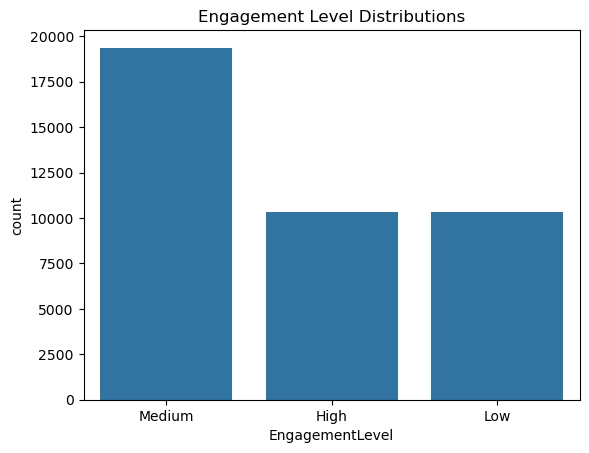

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="EngagementLevel",data=df)
plt.title("Engagement Level Distributions")
plt.show()

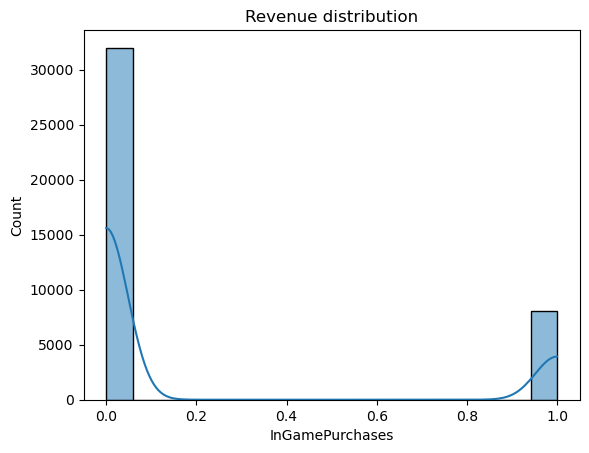

In [13]:
sns.histplot(df["InGamePurchases"],kde=True)
plt.title("Revenue distribution")
plt.show()

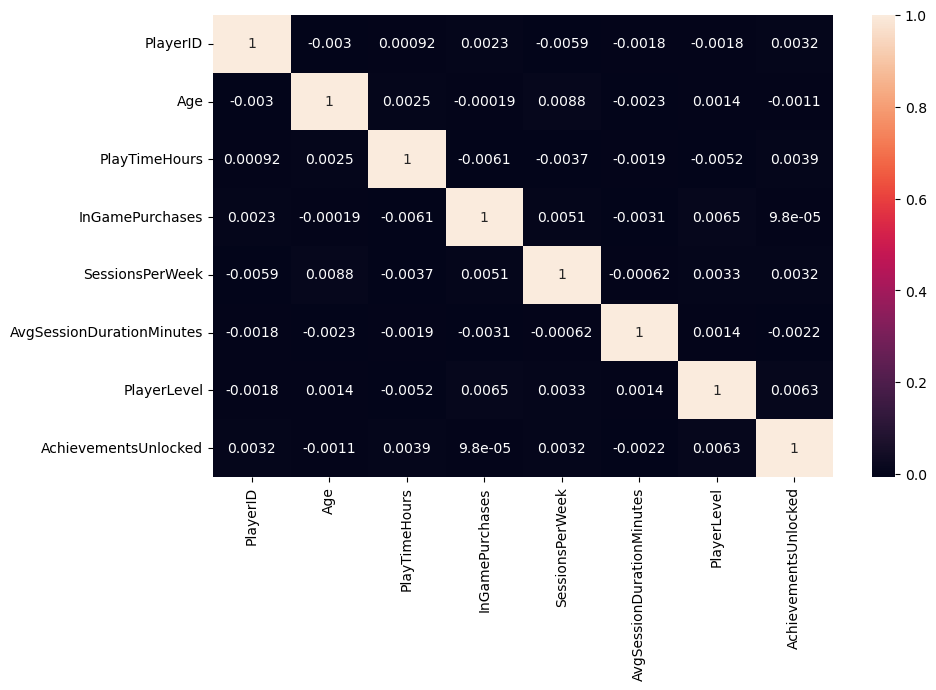

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
# Classification on EngagementLevel

In [63]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [64]:
x=df.drop(columns=["EngagementLevel","PlayerID"],axis=1)
y=df["EngagementLevel"]

In [65]:
cat_col=x.select_dtypes(include=["object"]).columns
num_col=x.select_dtypes(include=["int64","float64"]).columns

In [66]:
preprocessor=ColumnTransformer(transformers=[
    ("num",StandardScaler(),num_col),
    ("cat",OneHotEncoder(drop="first"),cat_col)
])

In [67]:
pipeline=Pipeline(steps=[
    ("preprocessing",preprocessor),
    ("model",RandomForestClassifier(
        random_state=42
    ))
])

In [68]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [69]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty'], dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [70]:
y_pred=pipeline.predict(x_test)

print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.9057075059323092
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2035
         Low       0.91      0.87      0.89      2093
      Medium       0.90      0.95      0.92      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.89      0.90      8007
weighted avg       0.91      0.91      0.91      8007



In [71]:
cv_score=cross_val_score(pipeline,x,y,cv=5)

print("cv score",cv_score)
print("Avg cv score",cv_score.mean())

cv score [0.90408393 0.90957912 0.90808043 0.91170226 0.90294779]
Avg cv score 0.9072787048280044


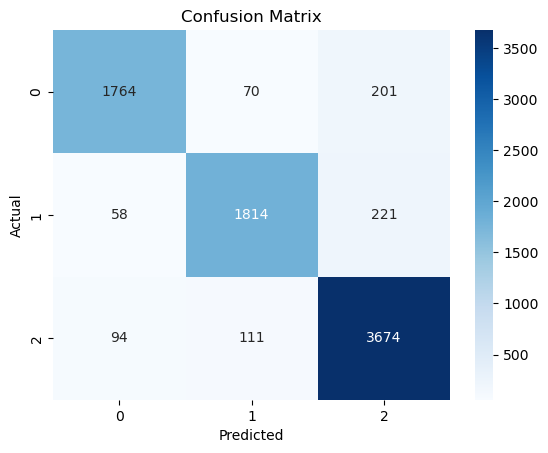

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
